# Week 3 - Segmenting and Clustering Neighborhoods in Toronto

# Part 1
Scrape the Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

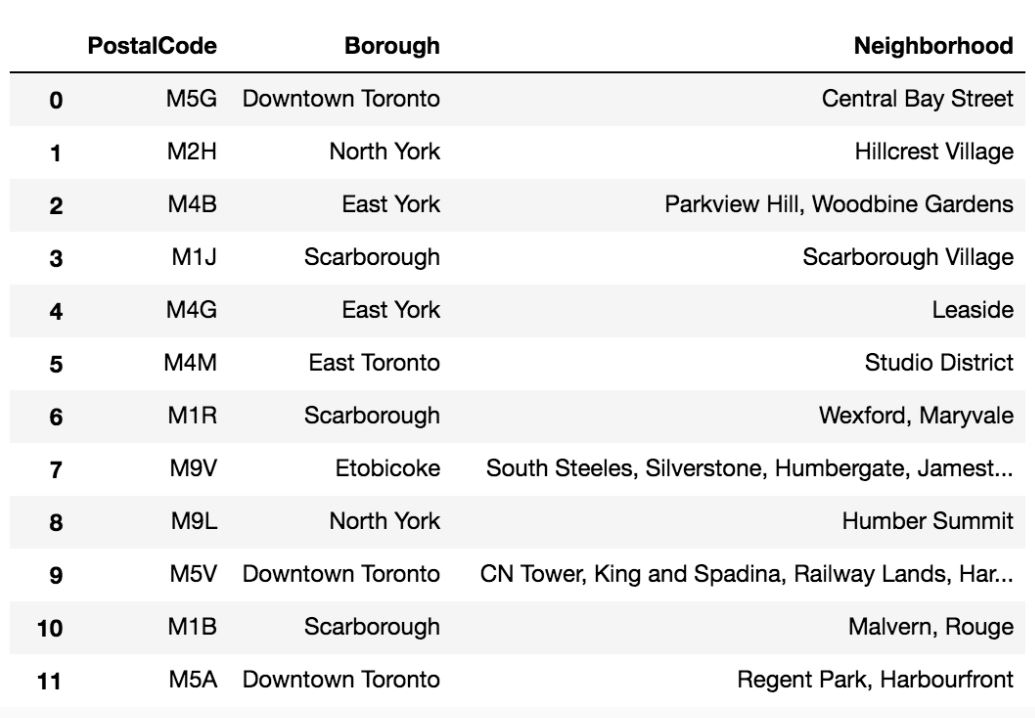

In [53]:
from IPython.display import Image
Image(filename =  "TableNeighborhood_Ex.jpg", width=500, height=500)

### i) Open the wikipedia page (html) and turn that into a soup object

# The first thing to do is to check the html code of the wikipedia page in order to understand where our table is located
1) I saved the html wikipedia page at my computer
2) Import BeautufulSoup & requests
3) Open the html file and turn that into a soup objet
4) Print the html code using the method prettify

In [57]:
from bs4 import BeautifulSoup
import requests
import wget

#Get the HTML file
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
wiki_html = wget.download(url)
print('Data downloaded!')

#Turn the page into a soup file
with open(wiki_html,encoding="utf8") as html_file:
    soup=BeautifulSoup(html_file,'lxml')

100% [..............................................................................] 79291 / 79291

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
print(soup.prettify())

In [2]:
# After goint through the file, we can see that our table is in the body of the table 
# <table class="wikitable sortable jquery-tablesorter">, starting at the line <tbody>


In [3]:
table=soup.find('table')
print(table)

<table class="wikitable sortable jquery-tablesorter">
<thead><tr>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Postcode</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Borough</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Neighbourhood
</th></tr></thead><tbody>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="https://en.wikipedia.org/wiki/North_York" title="North York">North York</a></td>
<td><a href="https://en.wikipedia.org/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="https://en.wikipedia.org/wiki/North_York" title="North York">North York</a></td>
<td><a href="https://en.wikipedia.org/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="htt

In [4]:
# As a test for the code I will create a loop to read through the table and print the postcode, borough and neighborhood name
# for each postcode

i=1
for neighborhood in table.tbody.find_all('tr'):
    print('neighborhood:',i)
    i=i+1
    for info in neighborhood.find_all('td'):
        print(info.text)

neighborhood: 1
M1A
Not assigned
Not assigned

neighborhood: 2
M2A
Not assigned
Not assigned

neighborhood: 3
M3A
North York
Parkwoods

neighborhood: 4
M4A
North York
Victoria Village

neighborhood: 5
M5A
Downtown Toronto
Harbourfront

neighborhood: 6
M5A
Downtown Toronto
Regent Park

neighborhood: 7
M6A
North York
Lawrence Heights

neighborhood: 8
M6A
North York
Lawrence Manor

neighborhood: 9
M7A
Queen's Park
Not assigned

neighborhood: 10
M8A
Not assigned
Not assigned

neighborhood: 11
M9A
Etobicoke
Islington Avenue

neighborhood: 12
M1B
Scarborough
Rouge

neighborhood: 13
M1B
Scarborough
Malvern

neighborhood: 14
M2B
Not assigned
Not assigned

neighborhood: 15
M3B
North York
Don Mills North

neighborhood: 16
M4B
East York
Woodbine Gardens

neighborhood: 17
M4B
East York
Parkview Hill

neighborhood: 18
M5B
Downtown Toronto
Ryerson

neighborhood: 19
M5B
Downtown Toronto
Garden District

neighborhood: 20
M6B
North York
Glencairn

neighborhood: 21
M7B
Not assigned
Not assigned

neighbo

It works!
So now instead of printing, I will create a panda dataset to receive the postcode, borough and neighborhood name for each postcode.

In [5]:
import pandas as pd

# define the dataframe columns
column_names = ['Postcode','Borough', 'Neighborhood'] 

# instantiate the dataframe
df = pd.DataFrame(columns=column_names)

for neighborhood in table.tbody.find_all('tr'):
    temp=[]
    for info in neighborhood.find_all('td'):
        temp.append(info.text.replace('\n',''))
        
    # If no borough is assigned, we will skip that PostCode
    if temp[1]!='Not assigned':
        # If no neighborhood is assigned, then we should assing the Borough name to the neighborhood name
        if temp[2]=='Not assigned':
            df=df.append({'Postcode':temp[0],'Borough':temp[1],'Neighborhood':temp[1]}, ignore_index=True)
        #Check if the borough is already listed in the dataframe
        elif temp[0] in df['Postcode'].values:
            old=df.loc[df['Postcode'] == temp[0], 'Neighborhood']
            new=old+', '+temp[2]
            df.loc[df['Postcode'] == temp[0], 'Neighborhood']=new
        else:
            df=df.append({'Postcode':temp[0],'Borough':temp[1],'Neighborhood':temp[2]}, ignore_index=True)


df.head(5)


,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [6]:
df.shape

(103, 3)

# Step 2: Getting lat and lon using Geocoder

I tried to use the geocoder (code at the cell below as markdown), but it didn't return the geotags for all the neighborhoods. So I will use the CSV file provided instead.

This is the code to get lat and lng using the geocoder. It didn't work. Returns lots of None.

===================

#Looping through the postal codes

for postal_code in df['Postcode']:

    #initialize variables to None
    lat_lng_coords=None

    #loop until you get the coordinates
    while(lat_lng_coords is None):
        g=geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords=g.latlng
    print(lat_lng_coords)
    df.loc[df['Postcode'] == postal_code, 'Latitude']=latitude=lat_lng_coords[0]
    df.loc[df['Postcode'] == postal_code, 'Longitude']=latitude=lat_lng_coords[1]

1) Import csv file provided

In [7]:
import wget
url='https://cocl.us/Geospatial_data'
lat_lng_set = wget.download(url)
print('Data downloaded!')

100% [................................................................................] 2891 / 2891Data downloaded!


In [8]:
geo_df = pd.read_csv(lat_lng_set)
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
# Merge dataframes
df = df.join(geo_df.set_index('Postal Code'), on='Postcode')

In [10]:
df.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


# Step 3 - Generate a map to visualize the neighborhoods & how to cluster them

In [11]:
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

# Create a dataframe with only boroughs that contain the word Toronto

In [12]:
df_toronto= df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)
df_toronto.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


# Let's first show all of Toronto's neighborhoods in a map:

In [13]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [14]:
# @hidden_cell
# Define Foursquare Credentials and Version


In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


# Let's create a function to repeat the same process to all the neighborhoods in toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)




In [16]:
# Call the function
LIMIT=100

toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )




Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Centre
Brockton, Exhibition Place, Parkdale Village
The Beaches West, India Bazaar
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North, Forest Hill West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Harbord, University of Toronto
Runnymede, Swansea
Moore Park, Summerhill East
Chinatown, Grange Park, Kensington Market
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
Fir

In [17]:
# Let's check the size of the resulting dataframe
print(toronto_venues.shape)
toronto_venues.head()




(1699, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Harbourfront, Regent Park",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Harbourfront, Regent Park",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Harbourfront, Regent Park",43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,Gym / Fitness Center
3,"Harbourfront, Regent Park",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Harbourfront, Regent Park",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


In [18]:
#Let's check how many venues were returned for each neighborhood
toronto_venues.groupby('Neighborhood').count()




,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,57,57,57,57,57,57
"Brockton, Exhibition Place, Parkdale Village",21,21,21,21,21,21
Business Reply Mail Processing Centre 969 Eastern,19,19,19,19,19,19
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",14,14,14,14,14,14
"Cabbagetown, St. James Town",45,45,45,45,45,45
Central Bay Street,84,84,84,84,84,84
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,15,15,15,15,15,15


In [19]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))




There are 239 uniques categories.


In [20]:
# Analize each neighborhood
#---------------------------

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()





,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# And let's examine the new dataframe size.
toronto_onehot.shape




(1699, 239)

In [22]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped



,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,...,0.00,0.000000,0.00000,0.00,0.010000,0.000000,0.000000,0.000000,0.010000,0.01
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.00
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Business Reply Mail Processing Centre 969 Eastern,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.000000,0.071429,0.071429,0.071429,0.142857,0.142857,0.142857,0.000000,...,0.00,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,"Cabbagetown, St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Central Bay Street,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011905,...,0.00,0.000000,0.00000,0.00,0.011905,0.000000,0.011905,0.000000,0.011905,0.00
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01,0.000000,0.00000,0.00,0.060000,0.000000,0.000000,0.040000,0.010000,0.00
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Church and Wellesley,0.011905,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011905,...,0.00,0.000000,0.00000,0.00,0.000000,0.011905,0.000000,0.011905,0.000000,0.00


In [23]:
# Let's confirm the size
toronto_grouped.shape



(38, 239)

In [24]:
#Let's print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    # Create a temporary dataframa with only 2 rows (titles & row that corresponds to the line of the specific neighborhood)
    # Using the property T, the dataframe is transposed, becoming a 'table' with 2 columns:
    # Ex: in the case of Yorkville
            #          index	39
            #0	Neighborhood	Yorkville
            #1	Accessories Store	0
            #2	Adult Boutique	0
            #3	Afghan Restaurant	0
            #4	African Restaurant	0
    
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    #We name the columns venue & frequency
    temp.columns = ['venue','freq']
    #And then we eliminate the 1st line (index=0) from the dataframe as this is the name of the neighborhood and
    #not a type of venue as the rows that follows it
    temp = temp.iloc[1:]
    #change the data in the column 'freq' into float and then round to 2 decimals
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #then print the top n venues for the neighborhood in analysis
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')




----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.08
1             Café  0.05
2       Steakhouse  0.04
3              Bar  0.04
4  Thai Restaurant  0.04


----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.05
2  Farmers Market  0.04
3      Steakhouse  0.04
4            Café  0.04


----Brockton, Exhibition Place, Parkdale Village----
            venue  freq
0            Café  0.10
1  Breakfast Spot  0.10
2     Coffee Shop  0.10
3             Gym  0.05
4   Burrito Place  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.11
1         Yoga Studio  0.05
2                Park  0.05
3          Comic Shop  0.05
4    Recording Studio  0.05


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0    Airport Lounge  0.14
1   Airport Service  0.14
2  Airport Terminal  0.14
3  

Let's put that into a pandas dataframe
First, let's write a function to sort the venues in descending order.

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
    # meu comentario: numpy.arange returns evenly spaced values within the interval 0 (as nothing diff was declared) and the num_top_venues
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,Steakhouse,Thai Restaurant,Restaurant,Gym,Asian Restaurant,Hotel,American Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Bakery,Steakhouse,Seafood Restaurant,Café,Farmers Market,Beer Bar,Eastern European Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Breakfast Spot,Café,Coffee Shop,Furniture / Home Store,Intersection,Caribbean Restaurant,Restaurant,Stadium,Climbing Gym,Bar
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Auto Workshop,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Park,Comic Shop,Recording Studio
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Plane,Sculpture Garden,Boat or Ferry,Harbor / Marina,Coffee Shop,Airport Gate,Airport Food Court


# Cluster neighborhoods

In [27]:
# 4. Cluster Neighborhoods¶
# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto 

# merge toronto_grouped with df_toronto to add latitude/longitude for each neighborhood

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,0,Coffee Shop,Park,Pub,Bakery,Café,Breakfast Spot,Restaurant,Mexican Restaurant,Theater,Electronics Store
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Cosmetics Shop,Middle Eastern Restaurant,Café,Bookstore,Restaurant,Ramen Restaurant,Bubble Tea Shop,Plaza
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Hotel,Italian Restaurant,Restaurant,Café,Coffee Shop,Breakfast Spot,Gastropub,Beer Bar,Cosmetics Shop,Bakery
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub,Coffee Shop,Farmers Market,Falafel Restaurant,Event Space,Fast Food Restaurant,Dive Bar,Filipino Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Cheese Shop,Bakery,Steakhouse,Seafood Restaurant,Café,Farmers Market,Beer Bar,Eastern European Restaurant


In [29]:
# Finally, let's visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
#5. Examine Clusters
#Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#Cluster 1¶
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]



,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Harbourfront, Regent Park",0,Coffee Shop,Park,Pub,Bakery,Café,Breakfast Spot,Restaurant,Mexican Restaurant,Theater,Electronics Store
1,"Ryerson, Garden District",0,Coffee Shop,Clothing Store,Cosmetics Shop,Middle Eastern Restaurant,Café,Bookstore,Restaurant,Ramen Restaurant,Bubble Tea Shop,Plaza
2,St. James Town,0,Hotel,Italian Restaurant,Restaurant,Café,Coffee Shop,Breakfast Spot,Gastropub,Beer Bar,Cosmetics Shop,Bakery
3,The Beaches,0,Health Food Store,Trail,Pub,Coffee Shop,Farmers Market,Falafel Restaurant,Event Space,Fast Food Restaurant,Dive Bar,Filipino Restaurant
4,Berczy Park,0,Coffee Shop,Cocktail Bar,Cheese Shop,Bakery,Steakhouse,Seafood Restaurant,Café,Farmers Market,Beer Bar,Eastern European Restaurant
5,Central Bay Street,0,Coffee Shop,Ice Cream Shop,Italian Restaurant,Sandwich Place,Burger Joint,Café,Chinese Restaurant,Salad Place,Bubble Tea Shop,Restaurant
6,Christie,0,Café,Grocery Store,Park,Diner,Convenience Store,Baby Store,Restaurant,Italian Restaurant,Nightclub,Coffee Shop
7,"Adelaide, King, Richmond",0,Coffee Shop,Café,Bar,Steakhouse,Thai Restaurant,Restaurant,Gym,Asian Restaurant,Hotel,American Restaurant
8,"Dovercourt Village, Dufferin",0,Bakery,Pharmacy,Supermarket,Pizza Place,Coffee Shop,Music Venue,Middle Eastern Restaurant,Café,Brewery,Bar
9,"Harbourfront East, Toronto Islands, Union Station",0,Coffee Shop,Hotel,Aquarium,Café,Italian Restaurant,Pizza Place,Fried Chicken Joint,Brewery,Scenic Lookout,Bakery


In [38]:
#Cluster 2¶
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Roselawn,1,Garden,Women's Store,Flea Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [39]:
#Cluster 3¶
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,"Moore Park, Summerhill East",2,Playground,Gym,Restaurant,Park,Women's Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
32,Rosedale,2,Park,Playground,Trail,Building,Women's Store,Electronics Store,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant


In [40]:


#Cluster 4¶
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]



,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,"Forest Hill North, Forest Hill West",3,Jewelry Store,Sushi Restaurant,Park,Trail,Women's Store,Electronics Store,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Event Space


In [41]:
#Cluster 5¶
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Lawrence Park,4,Park,Bus Line,Dim Sum Restaurant,Swim School,Women's Store,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
